# 🎯 Exclusive π⁰ Reconstruction — NPS Experiment (2023–2024)

## ✨ Physics Motivation

We aim to extract the **exclusive cross section** for the process:

$
e + p \rightarrow e' + \pi^0 + p'
$

in which:
- The scattered electron is detected in the **HMS**.
- The two photons from π⁰ decay (π⁰ → γγ) are detected in the **NPS**.
- We do **not detect the recoil proton**, so we will apply an **exclusive cut** based on the **missing mass = proton mass**.

---

## 📁 Data Summary

- **Experiment**: NPS run group (Sept 2023 – May 2024)
- **Input**: Skimmed ROOT files located at  
  `/lustre24/expphy/volatile/hallc/nps/singhav/ROOTfiles/pi0_skimmed/`
- **Event structure**: one electron in HMS and two neutral clusters in NPS


In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from vector import array as vec_array

# Physical constants
M_PROTON = 0.938  # GeV
M_PION0  = 0.135  # GeV

# Optional: Style
plt.style.use("seaborn-v0_8-poster")


In [2]:
# Load skimmed data file
file_path = "/home/ubuntu/nps_analysis/pi0_analysis/data/nps_hms_coin_skimmed_4487.root"
tree = uproot.open(file_path)["T"]

# Load branches
branches = tree.arrays([
    "T.hms.hEDTM_tdcTimeRaw", "T.hms.hTRIG4_tdcTimeRaw", "H.cal.etot", "H.cal.etotnorm",
    "H.cer.npeSum", "H.gtr.dp", "H.gtr.th", "H.gtr.ph", "H.gtr.y", "H.gtr.p", 
    "H.gtr.px", "H.gtr.py", "H.gtr.pz", "H.gtr.x", "H.gtr.y", "NPS.cal.nclust", "NPS.cal.clusE",
    "NPS.cal.clusX", "NPS.cal.clusY", "NPS.cal.clusT"
])

tree.keys()

['Ndata.NPS.cal.clusE',
 'NPS.cal.clusE',
 'Ndata.NPS.cal.clusT',
 'NPS.cal.clusT',
 'Ndata.NPS.cal.clusX',
 'NPS.cal.clusX',
 'Ndata.NPS.cal.clusY',
 'NPS.cal.clusY',
 'H.cal.etot',
 'H.cal.etotnorm',
 'H.cer.npeSum',
 'H.gtr.dp',
 'H.gtr.p',
 'H.gtr.ph',
 'H.gtr.px',
 'H.gtr.py',
 'H.gtr.pz',
 'H.gtr.th',
 'H.gtr.x',
 'H.gtr.y',
 'NPS.cal.nclust',
 'T.hms.hEDTM_tdcTimeRaw',
 'T.hms.hTRIG1_tdcTimeRaw',
 'T.hms.hTRIG2_tdcTimeRaw',
 'T.hms.hTRIG3_tdcTimeRaw',
 'T.hms.hTRIG4_tdcTimeRaw',
 'T.hms.hTRIG5_tdcTimeRaw',
 'T.hms.hTRIG6_tdcTimeRaw']

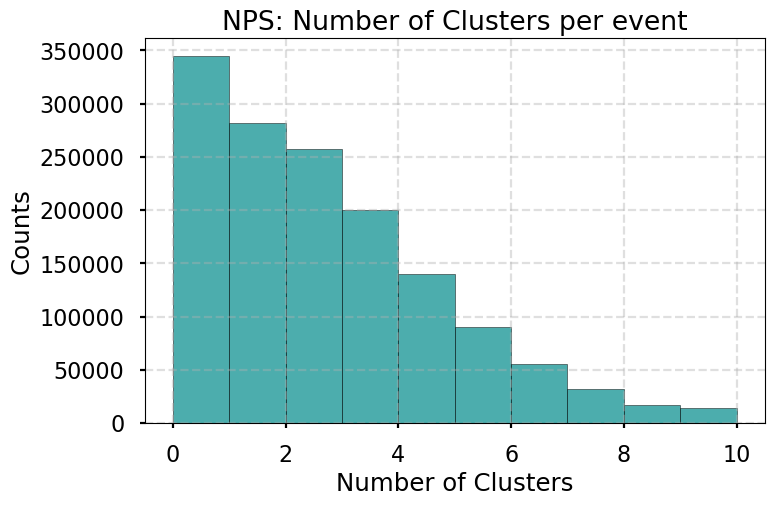

In [4]:
nclust = ak.to_numpy(branches["NPS.cal.nclust"])

plt.figure(figsize=(8, 5))
plt.hist(nclust, bins=np.arange(0, 10.5, 1), color="darkcyan", edgecolor="black", alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Counts")
plt.title("NPS: Number of Clusters per event")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


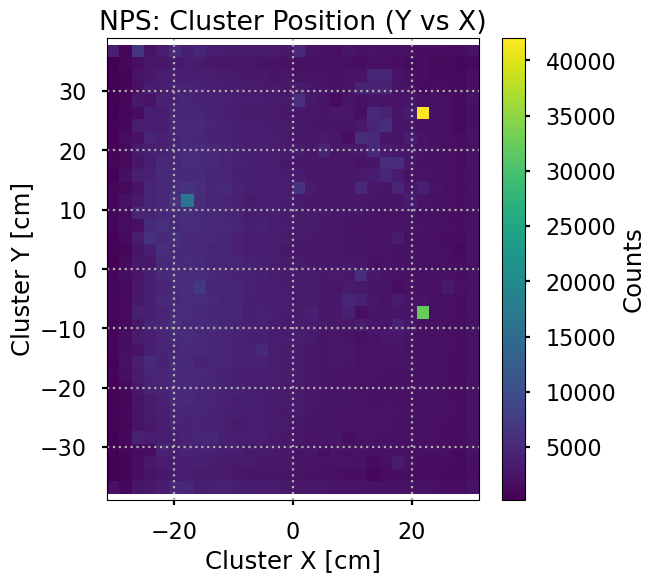

In [35]:
clusX = ak.to_numpy(ak.flatten(branches["NPS.cal.clusX"]))
clusY = ak.to_numpy(ak.flatten(branches["NPS.cal.clusY"]))

# clusX = ak.to_numpy((branches["NPS.cal.clusX"][:1]))
# clusY = ak.to_numpy((branches["NPS.cal.clusY"][:1]))

plt.figure(figsize=(6,6))
plt.hist2d(clusX, clusY, bins=(30,36), cmap='viridis')
plt.xlabel("Cluster X [cm]")
plt.ylabel("Cluster Y [cm]")
plt.title("NPS: Cluster Position (Y vs X)")
plt.colorbar(label="Counts")
plt.grid(True, linestyle=":")
plt.axis("equal")
plt.show()


In [55]:
clusX

array([ 30.33341272,  -5.05400463, -19.88802453, ...,  22.68      ,
        31.32      , -16.57234709], shape=(3282469,))

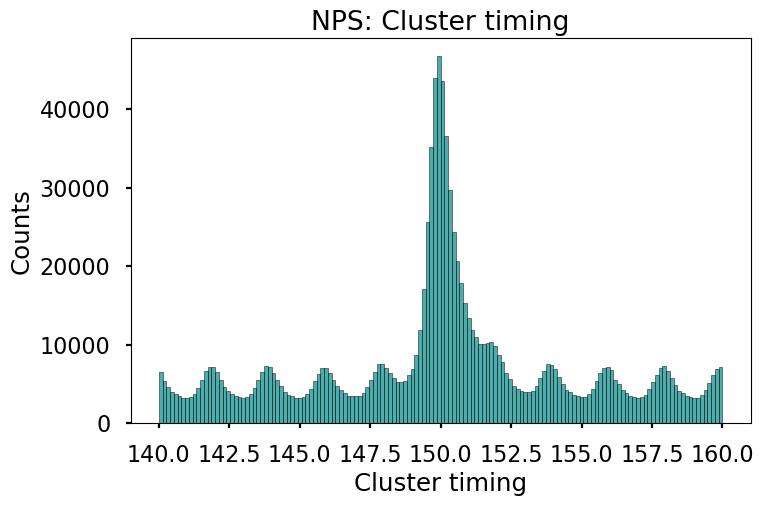

In [83]:
# includes all the cluster instances associated to the events.

clusT = ak.to_numpy(ak.flatten(branches["NPS.cal.clusT"]))

plt.figure(figsize=(8,5))
plt.hist(clusT, bins=150, range=(140,160), color="darkcyan", edgecolor="black", alpha=0.7)
plt.xlabel("Cluster timing")
plt.ylabel("Counts")
plt.title("NPS: Cluster timing")
plt.show()

/tmp/ipykernel_259648/3991225391.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  event_times_np = np.array(event_times)  # Convert to NumPy array


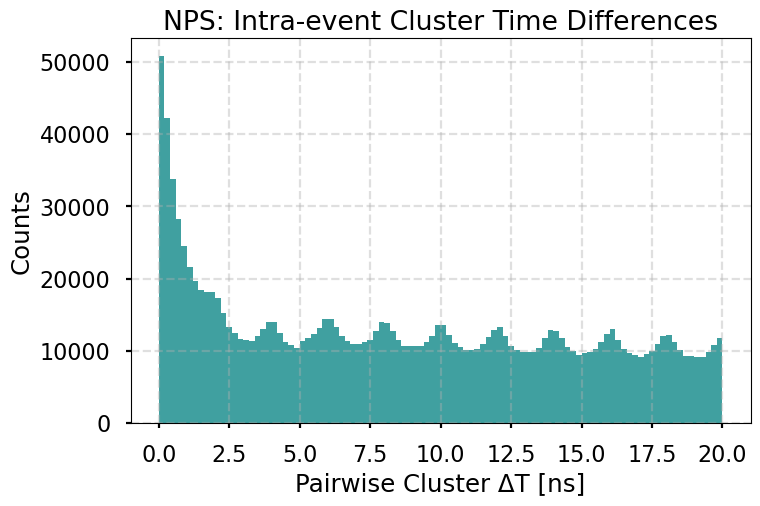

In [79]:
# plot pairwise time difference of the several instance of clusters associated to the same event.

clusT_all = branches["NPS.cal.clusT"]

time_diff = []

for event_times in clusT_all:
    event_times_np = np.array(event_times)  # Convert to NumPy array
    n = len(event_times_np)
    if n < 2:
        continue
    # Compute absolute pairwise time differences
    diffs = event_times_np[:, None] - event_times_np[None, :]
    triu = np.triu_indices(n, k=1)  # i < j to avoid duplicates and diagonal
    time_diff.extend(diffs[triu])

# Convert to NumPy array and plot
time_diff = np.array(time_diff)

plt.figure(figsize=(8,5))
plt.hist(time_diff, bins=100, range=(0, 20), color="teal", alpha=0.75)
plt.xlabel("Pairwise Cluster ΔT [ns]")
plt.ylabel("Counts")
plt.title("NPS: Intra-event Cluster Time Differences")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


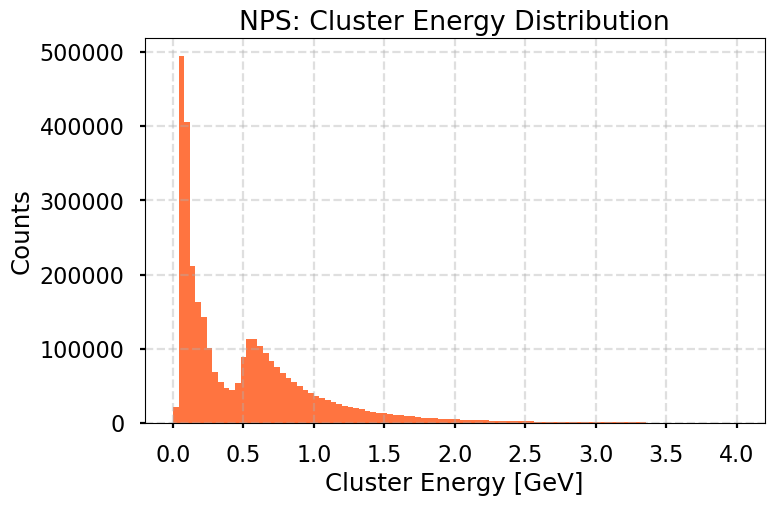

In [85]:
clusE = ak.to_numpy(ak.flatten(branches["NPS.cal.clusE"]))

plt.figure(figsize=(8,5))
plt.hist(clusE, bins=100, range=(0, 4), color="orangered", alpha=0.75)
plt.xlabel("Cluster Energy [GeV]")
plt.ylabel("Counts")
plt.title("NPS: Cluster Energy Distribution")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


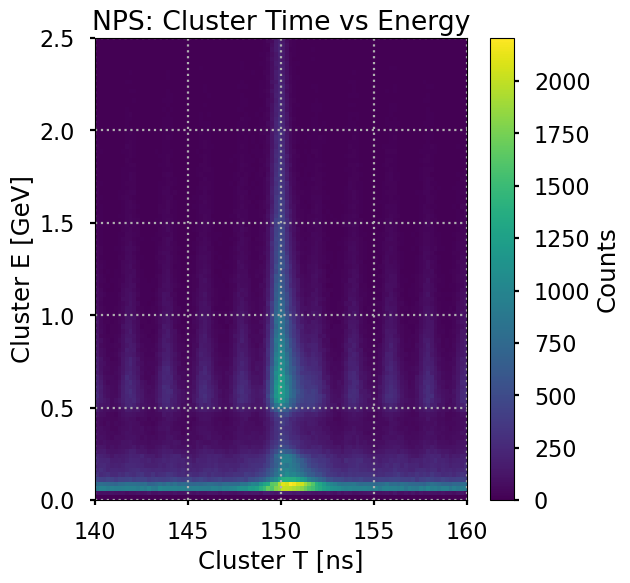

In [103]:
# Flatten jagged arrays to 1D NumPy arrays
clusT_flat = ak.to_numpy(ak.flatten(branches["NPS.cal.clusT"]))
clusE_flat = ak.to_numpy(ak.flatten(branches["NPS.cal.clusE"]))

plt.figure(figsize=(6,6))
plt.hist2d(clusT_flat, clusE_flat,
           bins=[100, 100],
           range=[[140, 160], [0, 2.5]],
           cmap='viridis')
plt.xlabel("Cluster T [ns]")
plt.ylabel("Cluster E [GeV]")
plt.title("NPS: Cluster Time vs Energy")
plt.colorbar(label="Counts")
plt.grid(True, linestyle=":")
plt.show()


In [ ]:
def reconstruct_pi0_mass(event):
    energies = event["NPS.cal.clusE"]
    xs = event["NPS.cal.clusX"]
    ys = event["NPS.cal.clusY"]

    if len(energies) < 2:
        return None  # Not enough clusters

    # Take the two highest-energy clusters
    idx = np.argsort(energies)[-2:]
    e1, e2 = energies[idx[0]], energies[idx[1]]
    x1, y1 = xs[idx[0]], ys[idx[0]]
    x2, y2 = xs[idx[1]], ys[idx[1]]

    # Assume vertex at origin, NPS at fixed z
    z_nps = 4.07  # meters, placeholder
    r1 = np.array([x1, y1, z_nps])
    r2 = np.array([x2, y2, z_nps])
    u1 = r1 / np.linalg.norm(r1)
    u2 = r2 / np.linalg.norm(r2)

    # Photon 3-momenta
    p1 = e1 * u1
    p2 = e2 * u2
    total_E = e1 + e2
    total_p = p1 + p2
    m2 = total_E**2 - np.dot(total_p, total_p)
    return np.sqrt(m2) if m2 > 0 else 0.0


<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_259648/3976835230.py:11: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
/tmp/ipykernel_259648/3976835230.py:14: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Reconstructed $\pi^0$ Mass from Two Photons")


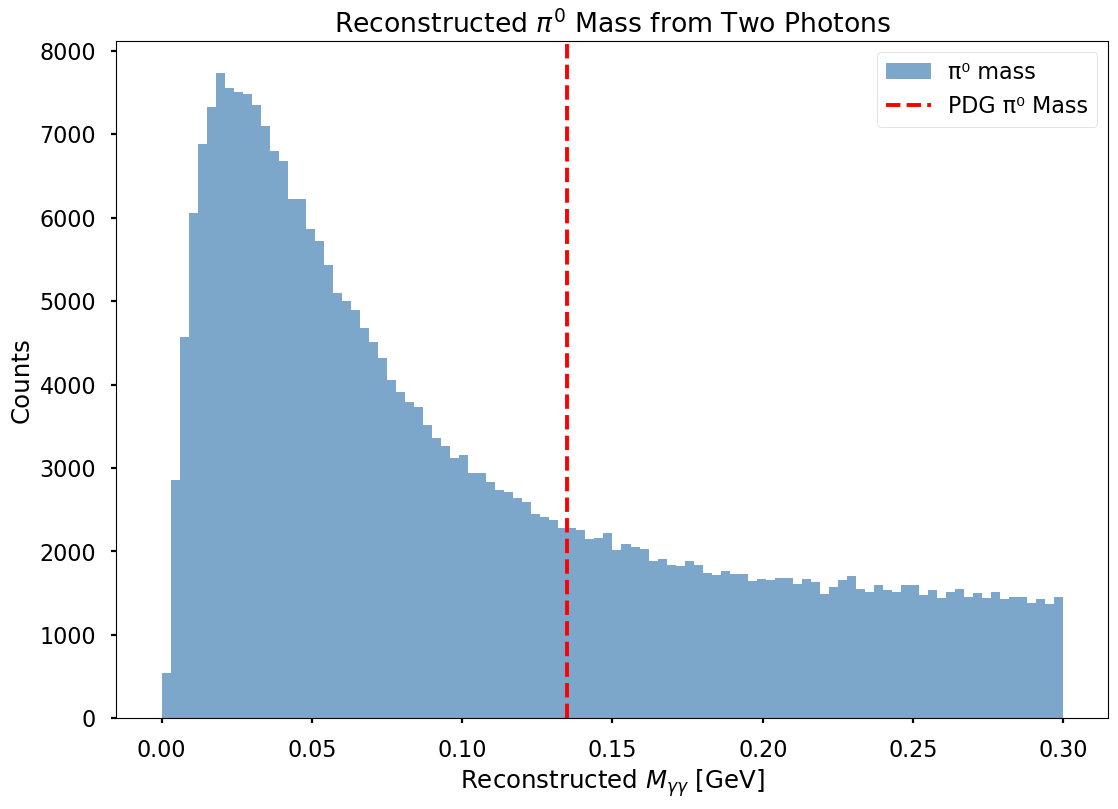

In [ ]:
pi0_masses = []

for evt in branches:
    m = reconstruct_pi0_mass(evt)
    if m:
        pi0_masses.append(m)

# Plot
plt.figure(figsize=(6,6))
plt.hist(pi0_masses, bins=100, range=(0, 0.3), color="steelblue", alpha=0.7, label="π⁰ mass")
plt.axvline(M_PION0, color='red', linestyle='--', label='PDG π⁰ Mass')
plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
plt.ylabel("Counts")
plt.legend()
plt.title("Reconstructed $\pi^0$ Mass from Two Photons")
plt.show()


In [ ]:
# much faster (around 4x) with numba then the prev cells using just plain python

import numba as nb
import numpy as np

@nb.njit
def reconstruct_pi0_mass_fast(e1, e2, x1, y1, x2, y2, z_nps=4.07):
    r1 = np.array([x1, y1, z_nps])
    r2 = np.array([x2, y2, z_nps])
    norm1 = np.sqrt(np.sum(r1 ** 2))
    norm2 = np.sqrt(np.sum(r2 ** 2))
    u1 = r1 / norm1
    u2 = r2 / norm2
    p1 = e1 * u1
    p2 = e2 * u2
    total_E = e1 + e2
    total_p = p1 + p2
    m2 = total_E**2 - np.dot(total_p, total_p)
    return np.sqrt(m2) if m2 > 0 else 0.0


<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_259648/1287418248.py:17: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
/tmp/ipykernel_259648/1287418248.py:20: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Reconstructed $\pi^0$ Mass from Two Photons")
/tmp/ipykernel_259648/1287418248.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  e = np.array(event["NPS.cal.clusE"])
/tmp/ipykernel_259648/1287418248.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=

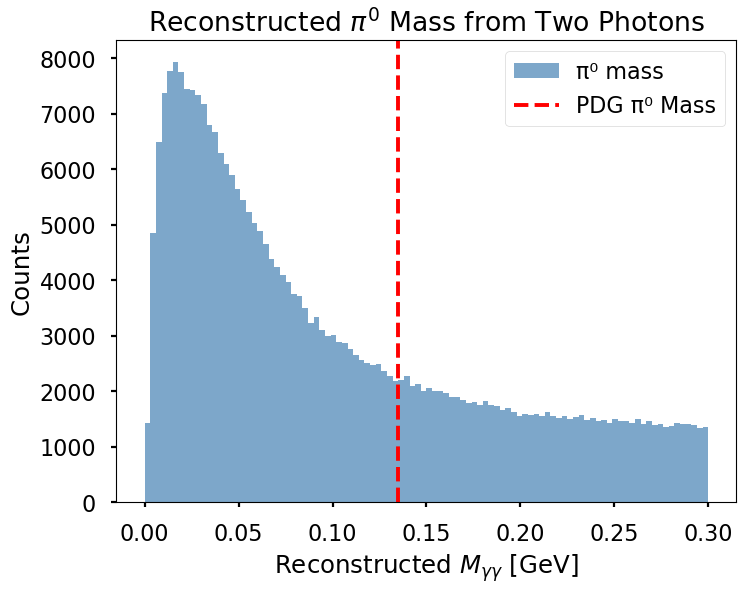

In [108]:
masses = []
for event in branches:  # loop over awkward array
    e = np.array(event["NPS.cal.clusE"])
    x = np.array(event["NPS.cal.clusX"])
    y = np.array(event["NPS.cal.clusY"])
    if len(e) < 2:
        continue
    idx = np.argsort(e)[-2:]
    masses.append(reconstruct_pi0_mass_fast(e[idx[0]], e[idx[1]],
                                            x[idx[0]], y[idx[0]],
                                            x[idx[1]], y[idx[1]]))
    
# Plot
plt.figure(figsize=(8,6))
plt.hist(masses, bins=100, range=(0, 0.3), color="steelblue", alpha=0.7, label="π⁰ mass")
plt.axvline(M_PION0, color='red', linestyle='--', label='PDG π⁰ Mass')
plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
plt.ylabel("Counts")
plt.legend()
plt.title("Reconstructed $\pi^0$ Mass from Two Photons")
plt.show()


In [119]:
# HMS time per event
hmsT = branches["T.hms.hEDTM_tdcTimeRaw"]
clusT = branches["NPS.cal.clusT"]

# Compute deltaT (cluster time - HMS time) per cluster
deltaT = clusT - hmsT  # This uses broadcasting via awkward arrays

# Coincidence window: 149–151 ns (~±1 ns from peak)
signal_mask = (deltaT > 149) & (deltaT < 151)

# Background windows (like your bgLo/bgHi)
bg_lo_mask = (deltaT > 113) & (deltaT < 142.5)
bg_hi_mask = (deltaT > 171.5) & (deltaT < 180)



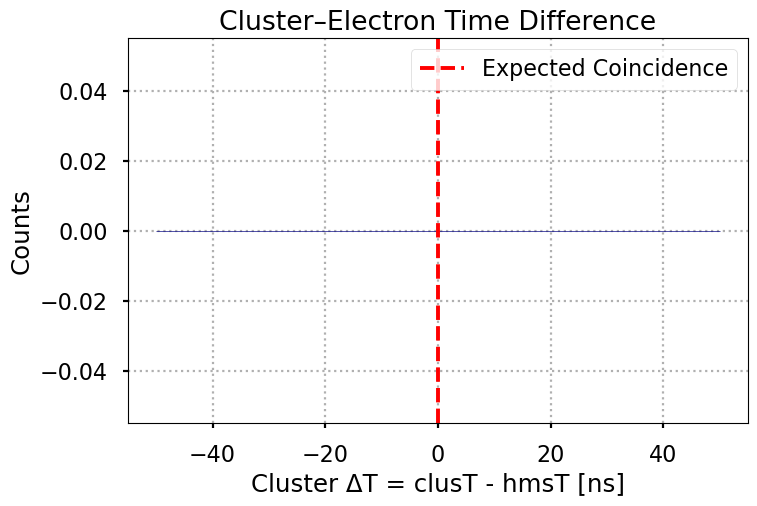

In [122]:
deltaT_flat = ak.to_numpy(ak.flatten(deltaT))
plt.figure(figsize=(8,5))
plt.hist(deltaT_flat, bins=10, range=(-50, 50), histtype='step', color='navy')
plt.xlabel("Cluster ΔT = clusT - hmsT [ns]")
plt.ylabel("Counts")
plt.title("Cluster–Electron Time Difference")
plt.grid(True, linestyle=":")
plt.axvline(0, color="red", linestyle="--", label="Expected Coincidence")
plt.legend()
plt.show()

# Opening Angle Calculation

The neutral pion decays via:

$$
\pi^0 \to \gamma\gamma
$$

Using four-momentum conservation:

$$
P_\pi^2 = (P_{\gamma_1} + P_{\gamma_2})^2
$$

Expanding the right-hand side:

$$
m_\pi^2 = P_{\gamma_1}^2 + P_{\gamma_2}^2 + 2P_{\gamma_1}^\mu P_{\gamma_2\mu}
$$

Since photons are massless, $ P_{\gamma_i}^2 = 0 $, so:

$$
m_\pi^2 = 2P_{\gamma_1}^\mu P_{\gamma_2\mu}
$$

Using the inner product of four-vectors:

$$
m_\pi^2 = 2 \left( E_{\gamma_1}E_{\gamma_2} - \vec{p}_{\gamma_1} \cdot \vec{p}_{\gamma_2} \right)
$$

The dot product can be written in terms of the opening angle $\theta$ between the two photons:

$$
\vec{p}_{\gamma_1} \cdot \vec{p}_{\gamma_2} = |\vec{p}_{\gamma_1}||\vec{p}_{\gamma_2}|\cos\theta
$$

Since $ |\vec{p}_{\gamma_i}| = E_{\gamma_i} $ for photons:

$$
m_\pi^2 = 2E_{\gamma_1}E_{\gamma_2}(1 - \cos\theta)
$$

Using the identity $( 1 - \cos\theta = 2\sin^2(\theta/2) )$, we get:

$$
m_\pi^2 = 4E_{\gamma_1}E_{\gamma_2} \sin^2(\theta/2)
$$

Solving for the opening angle $\theta$:

$$
\theta = 2 \sin^{-1}\left( \frac{m_\pi}{\sqrt{4E_{\gamma_1}E_{\gamma_2}}} \right)
$$

This relation can be used as a **kinematic constraint** to validate whether a photon pair is consistent with originating from a real $ \pi^0 $ decay.


In [13]:
# function to reconcstruct invariant neutral pion mass taking into account the opening angle

import numba as nb
import numpy as np

M_PION0  = 0.135  # GeV

@nb.njit
def reconstruct_pi0_mass_fast_w_opening_angle(e1, e2, x1, y1, x2, y2, z_nps=4.07):
    r1 = np.array([x1, y1, z_nps])
    r2 = np.array([x2, y2, z_nps])
    norm1 = np.sqrt(np.sum(r1 ** 2))
    norm2 = np.sqrt(np.sum(r2 ** 2))
    u1 = r1 / norm1
    u2 = r2 / norm2
    p1 = e1 * u1
    p2 = e2 * u2
    total_E = e1 + e2
    total_p = p1 + p2

    # Opening angle cut
    theta_ideal = 2 * np.arcsin(M_PION0 / np.sqrt(4 * e1 * e2))
    dot = np.dot(u1, u2)
    dot = min(1.0, max(-1.0, dot))  # Clamp to avoid NaNs from rounding errors
    theta_data = np.arccos(dot)


    # block_dim = 0.0205 # 2.05 x 2.05 cm^2 PbWO4 scintillator block
    theta_tolerance_rad = 0.02 # considering a cluster size of 4x4 blocks and the distance of NPS of 4.07 m. theta = (4x0.0205)/nps_distance

    if np.abs(theta_data - theta_ideal) < theta_tolerance_rad:  # radians
        m2 = total_E**2 - np.dot(total_p, total_p)
        return np.sqrt(m2) if m2 > 0 else 0.0
    else:
        return 0.0  # Or np.nan if you prefer masking out

In [14]:
masses = []
for event in branches:  # loop over awkward array
    e = np.asarray(event["NPS.cal.clusE"])
    x = np.asarray(event["NPS.cal.clusX"])
    y = np.asarray(event["NPS.cal.clusY"])
    if len(e) < 2:
        continue
    idx = np.argsort(e)[-2:]
    masses.append(reconstruct_pi0_mass_fast_w_opening_angle(e[idx[0]], e[idx[1]],
                                            x[idx[0]], y[idx[0]],
                                            x[idx[1]], y[idx[1]]))
    


<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_947/119554853.py:4: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
/tmp/ipykernel_947/119554853.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Reconstructed $\pi^0$ Mass from Two Photons")


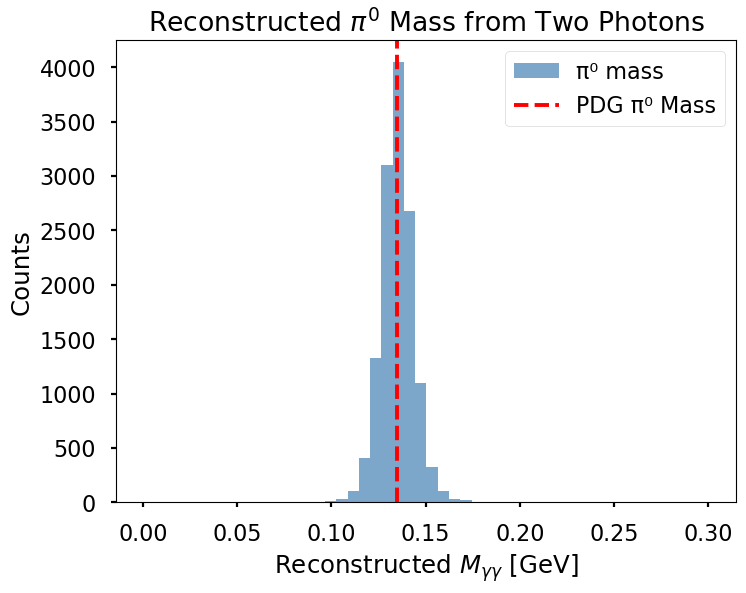

In [15]:
plt.figure(figsize=(8,6))
plt.hist(masses, bins=50, range=(0.001, 0.3), color="steelblue", alpha=0.7, label="π⁰ mass")
plt.axvline(M_PION0, color='red', linestyle='--', label='PDG π⁰ Mass')
plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
plt.ylabel("Counts")
plt.legend()
plt.title("Reconstructed $\pi^0$ Mass from Two Photons")
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_947/2489511093.py:16: SyntaxWarning: invalid escape sequence '\p'
  density=True, color="steelblue", alpha=0.6, label="Reconstructed $\pi^0$ Mass"
/tmp/ipykernel_947/2489511093.py:25: SyntaxWarning: invalid escape sequence '\p'
  plt.axvline(0.13498, color='red', linestyle='--', label='PDG $\pi^0$ Mass (134.98 MeV)')
/tmp/ipykernel_947/2489511093.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]", fontsize=14)
/tmp/ipykernel_947/2489511093.py:30: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Reconstructed $

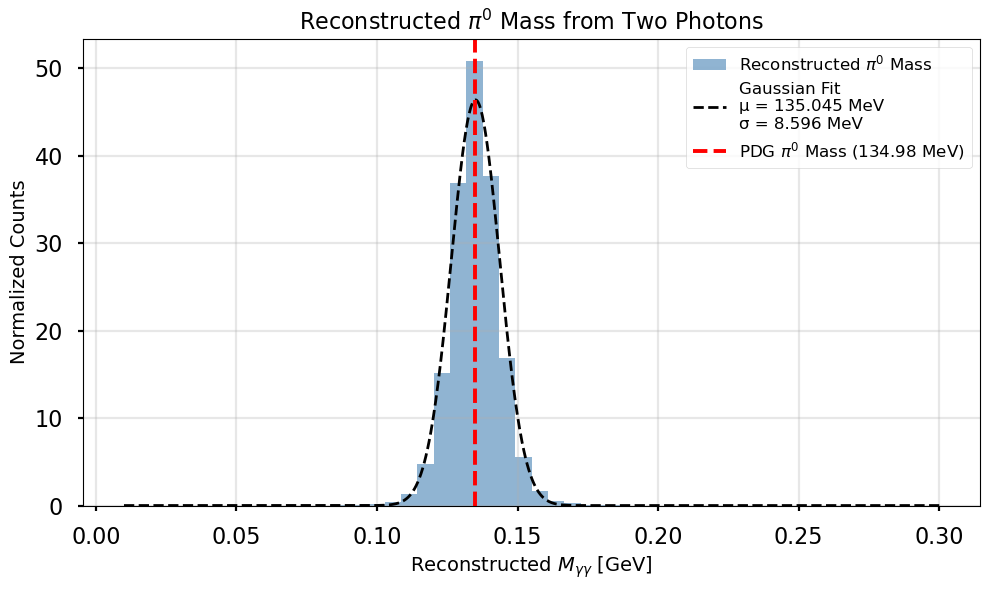

Fitted Mean: 0.1350 GeV
Fitted Std Dev: 0.0086 GeV


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming `masses` is your array of reconstructed π⁰ masses
masses_clean = np.array(masses)
masses_clean = masses_clean[(masses_clean > 0.01) & (masses_clean < 0.3)]

# Fit a Gaussian
mu, std = norm.fit(masses_clean)

# Plot histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(
    masses_clean, bins=50, range=(0.01, 0.3), 
    density=True, color="steelblue", alpha=0.6, label="Reconstructed $\pi^0$ Mass"
)

# Plot Gaussian fit
x = np.linspace(0.01, 0.3, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k--', linewidth=2, label=f'Gaussian Fit\nμ = {1000*mu:.3f} MeV\nσ = {1000*std:.3f} MeV')

# PDG mass line
plt.axvline(0.13498, color='red', linestyle='--', label='PDG $\pi^0$ Mass (134.98 MeV)')

# Labels and legend
plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]", fontsize=14)
plt.ylabel("Normalized Counts", fontsize=14)
plt.title("Reconstructed $\pi^0$ Mass from Two Photons", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fitted Mean: {mu:.4f} GeV")
print(f"Fitted Std Dev: {std:.4f} GeV")


In [3]:
# trying out helper functions from Josh's script

import numpy as np

def normalize_peaks(y, win, frac):
    y = np.array(y)
    out = y.copy()
    ymax = np.max(y)
    thr = frac * ymax
    cand = [i for i in range(1, len(y)-1) if y[i] > y[i-1] and y[i] > y[i+1] and y[i] > thr]
    
    peaks = []
    for p in cand:
        if not peaks or p - peaks[-1] >= win:
            peaks.append(p)
        elif y[p] > y[peaks[-1]]:
            peaks[-1] = p

    if not peaks:
        return out

    avg = np.mean([y[p] for p in peaks])
    h = win // 2
    for p in peaks:
        scl = avg / y[p]
        for i in range(max(0, p-h), min(len(y), p+h+1)):
            w = 1.0 - abs(i - p) / (win + 1)
            out[i] = y[i] * (1 - w) + (y[i] * scl) * w

    return out


In [8]:
nclust_temp = ak.to_numpy(ak.flatten(branches["NPS.cal.clusT"]))

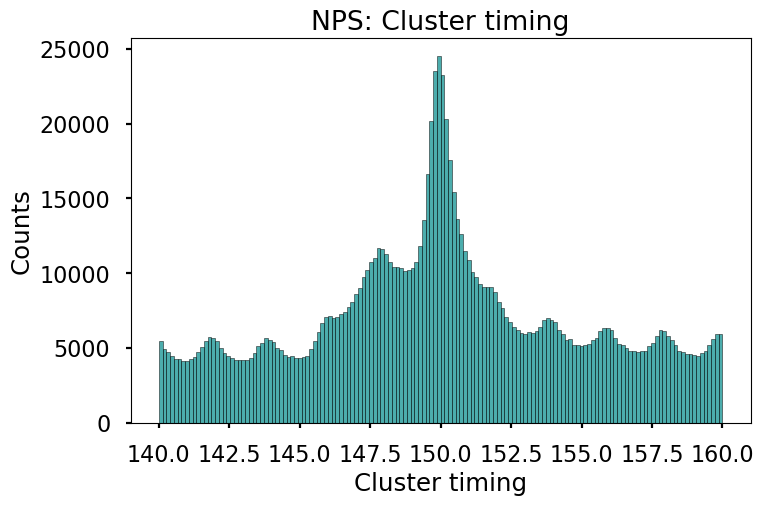

In [10]:
temp1 = normalize_peaks(nclust_temp, 10, 0.75)
plt.figure(figsize=(8,5))
plt.hist(temp1, bins=150, range=(140,160), color="darkcyan", edgecolor="black", alpha=0.7)
plt.xlabel("Cluster timing")
plt.ylabel("Counts")
plt.title("NPS: Cluster timing")
plt.show()

In [4]:
import uproot
import pandas as pd

# Path to your skimmed ROOT file
root_file = "/home/ubuntu/nps_analysis/pi0_analysis/data/nps_hms_coin_skimmed_4487.root"

# Open the file
file = uproot.open(root_file)
tree = file["T"]  # or whatever your TTree name is

# Select the branches you want
branches = [
    "T.hms.hEDTM_tdcTimeRaw",
    "H.gtr.dp", "H.cal.etotnorm", "H.cer.npeSum",
    "H.gtr.th", "H.gtr.ph", "H.gtr.p",
    "NPS.cal.nclust",
    "NPS.cal.clusE", "NPS.cal.clusX", "NPS.cal.clusY", "NPS.cal.clusT"
]

# Load into DataFrame
df = tree.arrays(branches, library="pd")


# Include Josh's good cluster cuts

<>:135: SyntaxWarning: invalid escape sequence '\g'
<>:137: SyntaxWarning: invalid escape sequence '\p'
<>:135: SyntaxWarning: invalid escape sequence '\g'
<>:137: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_400189/1116457505.py:135: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
/tmp/ipykernel_400189/1116457505.py:137: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Reconstructed $\pi^0$ Mass with HMS and Cluster Cuts")


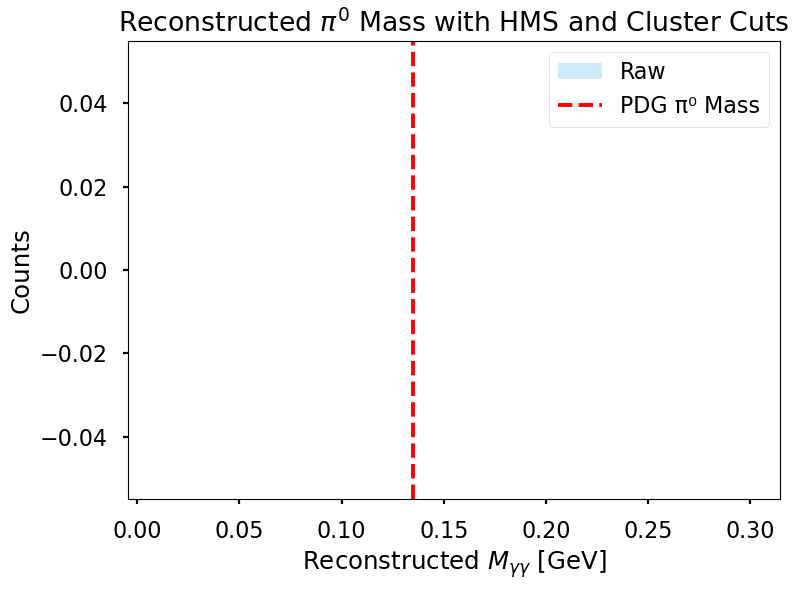

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

# --- Analysis constants ---
theta0_deg = 19.36
theta0_rad = np.deg2rad(theta0_deg)
M_PION0 = 0.13498  # GeV
z_nps = 4.07       # m (NPS z-position from target)

@nb.njit

# --- HMS and NPS cut helpers ---
def pass_hms_cuts(edt, dp, et, npe, th, ph):
    return (edt < 0.1 and abs(dp) <= 8.5 and et > 0.6 and npe > 1.0 and
            abs(th) <= 0.09 and abs(ph) <= 0.09)

def is_good_cluster(e, t, x, y):
    return (e >= 0.6 and 149 <= t <= 151 and
            -29.16 < x < 29.16 and -35.64 < y < 35.64)

def comp_q2(E0, Ep, th, ph):
    th_tot = theta0_rad + th
    cosT = np.cos(th_tot) * np.cos(ph)
    return 2.0 * E0 * Ep * (1.0 - cosT)

# --- π⁰ reconstruction with opening angle cut ---
def reconstruct_pi0(e1, e2, x1, y1, x2, y2):
    r1 = np.array([x1, y1, z_nps])
    r2 = np.array([x2, y2, z_nps])
    u1 = r1 / np.linalg.norm(r1)
    u2 = r2 / np.linalg.norm(r2)
    p1 = e1 * u1
    p2 = e2 * u2
    # theta_data = np.arccos(np.clip(np.dot(u1, u2)))
    # theta_ideal = 2 * np.arcsin(M_PION0 / np.sqrt(4 * e1 * e2))
    # if abs(theta_data - theta_ideal) > 0.03: return None
    E_tot = e1 + e2
    p_tot = p1 + p2
    m2 = E_tot**2 - np.dot(p_tot, p_tot)
    return np.sqrt(m2) if m2 > 0 else None

# def reconstruct_pi0_mass_fast_w_opening_angle(e1, e2, x1, y1, x2, y2, z_nps=4.07):
#     r1 = np.array([x1, y1, z_nps])
#     r2 = np.array([x2, y2, z_nps])
#     norm1 = np.sqrt(np.sum(r1 ** 2))
#     norm2 = np.sqrt(np.sum(r2 ** 2))
#     u1 = r1 / norm1
#     u2 = r2 / norm2
#     p1 = e1 * u1
#     p2 = e2 * u2
#     total_E = e1 + e2
#     total_p = p1 + p2

#     # Opening angle cut
#     theta_ideal = 2 * np.arcsin(M_PION0 / np.sqrt(4 * e1 * e2))
#     dot = np.dot(u1, u2)
#     dot = min(1.0, max(-1.0, dot))  # Clamp to avoid NaNs from rounding errors
#     theta_data = np.arccos(dot)


#     # block_dim = 0.0205 # 2.05 x 2.05 cm^2 PbWO4 scintillator block
#     theta_tolerance_rad = 0.02 # considering a cluster size of 4x4 blocks and the distance of NPS of 4.07 m. theta = (4x0.0205)/nps_distance

#     if np.abs(theta_data - theta_ideal) < theta_tolerance_rad:  # radians
#         m2 = total_E**2 - np.dot(total_p, total_p)
#         return np.sqrt(m2) if m2 > 0 else 0.0
#     else:
#         return 0.0  # Or np.nan if you prefer masking out

# --- Data Loop (replace with your actual data arrays) ---
masses_josh_cuts = []
# q2_vals = []

for i in range(len(df)):
    row = df.iloc[i]

    # HMS cuts
    if not pass_hms_cuts(row["T.hms.hEDTM_tdcTimeRaw"],
                         row["H.gtr.dp"],
                         row["H.cal.etotnorm"],
                         row["H.cer.npeSum"],
                         row["H.gtr.th"],
                         row["H.gtr.ph"]):
        continue

    # Cluster cuts
    if row["NPS.cal.nclust"] < 2: continue
    e1, e2 = row["NPS.cal.clusE"][0], row["NPS.cal.clusE"][1]
    x1, x2 = row["NPS.cal.clusX"][0], row["NPS.cal.clusX"][1]
    y1, y2 = row["NPS.cal.clusY"][0], row["NPS.cal.clusY"][1]
    t1, t2 = row["NPS.cal.clusT"][0], row["NPS.cal.clusT"][1]

    if not (is_good_cluster(e1, t1, x1, y1) and is_good_cluster(e2, t2, x2, y2)):
        continue

    # π⁰ mass reconstruction
    m_pi0 = reconstruct_pi0(e1, e2, x1, y1, x2, y2)
    if m_pi0: masses.append(m_pi0)

    # Q² computation
    # q2_vals.append(comp_q2(10.6, row["H.gtr.p"], row["H.gtr.th"], row["H.gtr.ph"]))  # adjust beam E

# --- Plot with smoothing (optional) ---
def normalize_peaks(y, win=5, frac=0.1):
    y = np.array(y)
    out = y.copy()
    ymax = np.max(y)
    thr = frac * ymax
    cand = [i for i in range(1, len(y)-1) if y[i] > y[i-1] and y[i] > y[i+1] and y[i] > thr]
    peaks = []
    for p in cand:
        if not peaks or p - peaks[-1] >= win:
            peaks.append(p)
        elif y[p] > y[peaks[-1]]:
            peaks[-1] = p
    if not peaks: return out
    avg = np.mean([y[p] for p in peaks])
    h = win // 2
    for p in peaks:
        scl = avg / y[p]
        for i in range(max(0, p-h), min(len(y), p+h+1)):
            w = 1.0 - abs(i - p) / (win + 1)
            out[i] = y[i] * (1 - w) + (y[i] * scl) * w
    return out

# --- Plotting the π⁰ mass histogram ---
# counts, bins = np.histogram(masses, bins=50, range=(0.01, 0.3))
# smoothed = normalize_peaks(counts, win=3)

plt.figure(figsize=(8,6))
# plt.plot((bins[1:] + bins[:-1])/2, smoothed, label='Smoothed', color='navy')
plt.hist(masses_josh_cuts, bins=50, range=(0.01, 0.3), color='skyblue', alpha=0.4, label='Raw', histtype='stepfilled')
plt.axvline(M_PION0, color='red', linestyle='--', label='PDG π⁰ Mass')
plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]")
plt.ylabel("Counts")
plt.title("Reconstructed $\pi^0$ Mass with HMS and Cluster Cuts")
plt.legend()
plt.tight_layout()
plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_400189/3089243762.py:16: SyntaxWarning: invalid escape sequence '\p'
  density=True, color="steelblue", alpha=0.6, label="Reconstructed $\pi^0$ Mass"
/tmp/ipykernel_400189/3089243762.py:25: SyntaxWarning: invalid escape sequence '\p'
  plt.axvline(0.13498, color='red', linestyle='--', label='PDG $\pi^0$ Mass (134.98 MeV)')
/tmp/ipykernel_400189/3089243762.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]", fontsize=14)
/tmp/ipykernel_400189/3089243762.py:30: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Rec

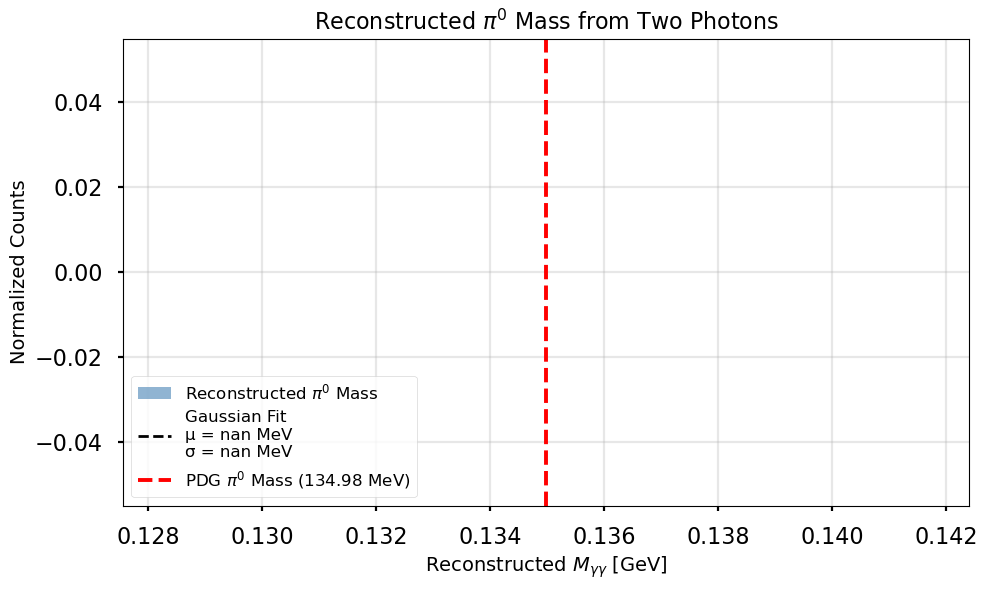

Fitted Mean: nan GeV
Fitted Std Dev: nan GeV


In [8]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming `masses` is your array of reconstructed π⁰ masses
masses_clean = np.array(masses_josh_cuts)
masses_clean = masses_clean[(masses_clean > 0.01) & (masses_clean < 0.3)]

# Fit a Gaussian
mu, std = norm.fit(masses_clean)

# Plot histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(
    masses_clean, bins=50, range=(0.01, 0.3), 
    density=True, color="steelblue", alpha=0.6, label="Reconstructed $\pi^0$ Mass"
)

# Plot Gaussian fit
x = np.linspace(0.01, 0.3, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k--', linewidth=2, label=f'Gaussian Fit\nμ = {1000*mu:.3f} MeV\nσ = {1000*std:.3f} MeV')

# PDG mass line
plt.axvline(0.13498, color='red', linestyle='--', label='PDG $\pi^0$ Mass (134.98 MeV)')

# Labels and legend
plt.xlabel("Reconstructed $M_{\gamma\gamma}$ [GeV]", fontsize=14)
plt.ylabel("Normalized Counts", fontsize=14)
plt.title("Reconstructed $\pi^0$ Mass from Two Photons", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fitted Mean: {mu:.4f} GeV")
print(f"Fitted Std Dev: {std:.4f} GeV")


# Background subtraction tests

In [ ]:
# Load skimmed data file
file_path = "/home/ubuntu/nps_analysis/pi0_analysis/data/nps_hms_coin_skimmed_4487.root"
tree = uproot.open(file_path)["T"]

# Load branches
branches = tree.arrays([
    "T.hms.hEDTM_tdcTimeRaw", "T.hms.hTRIG4_tdcTimeRaw", "H.cal.etot", "H.cal.etotnorm",
    "H.cer.npeSum", "H.gtr.dp", "H.gtr.th", "H.gtr.ph", "H.gtr.y", "H.gtr.p", 
    "H.gtr.px", "H.gtr.py", "H.gtr.pz", "H.gtr.x", "H.gtr.y", "NPS.cal.nclust", "NPS.cal.clusE",
    "NPS.cal.clusX", "NPS.cal.clusY", "NPS.cal.clusT"
])


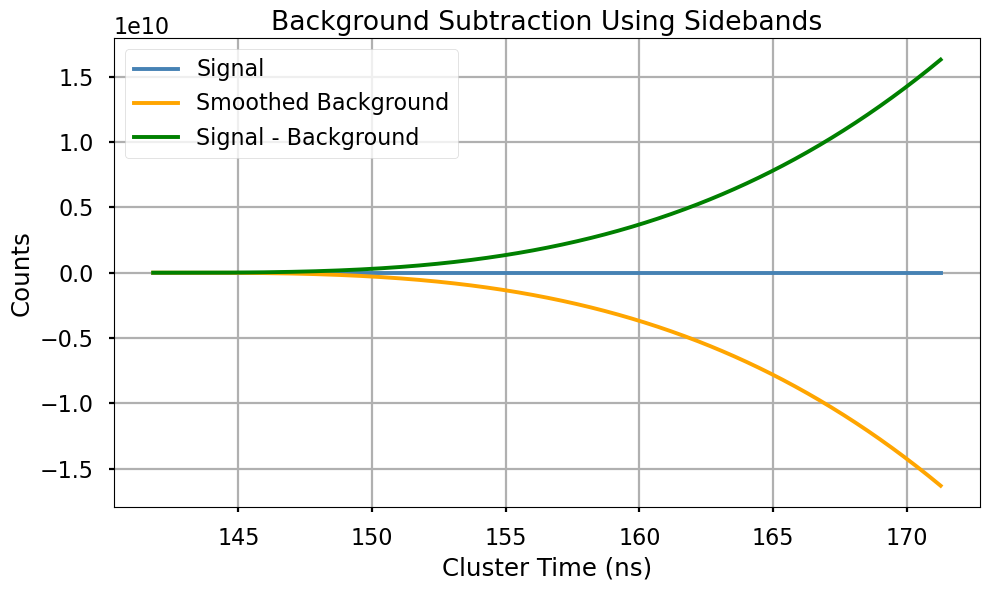

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import awkward as ak

# Define time windows and bins
bgLo, bgHi = 113, 142.5
sigLo, sigHi = 141.789, 171.289
nBins = 650

# Flatten cluster time array from NPS
clusT = ak.to_numpy(ak.flatten(branches["NPS.cal.clusT"]))

# Masks for time regions
bg_mask = (clusT >= bgLo) & (clusT <= bgHi)
sig_mask = (clusT >= sigLo) & (clusT <= sigHi)

# Fill histograms
bg_hist, bg_edges = np.histogram(clusT[bg_mask], bins=nBins, range=(bgLo, bgHi))
sig_hist, sig_edges = np.histogram(clusT[sig_mask], bins=nBins, range=(sigLo, sigHi))

# Bin centers
bg_centers = 0.5 * (bg_edges[1:] + bg_edges[:-1])
sig_centers = 0.5 * (sig_edges[1:] + sig_edges[:-1])

# Interpolate background using spline
spline = UnivariateSpline(bg_centers, bg_hist, s=0.5 * nBins)
bg_smooth = spline(sig_centers)  # Evaluate background over signal bin centers

# Subtract smoothed background from signal
sig_subtracted = sig_hist - bg_smooth

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sig_centers, sig_hist, label='Signal', color='steelblue')
plt.plot(sig_centers, bg_smooth, label='Smoothed Background', color='orange')
plt.plot(sig_centers, sig_subtracted, label='Signal - Background', color='green')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Background Subtraction Using Sidebands")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


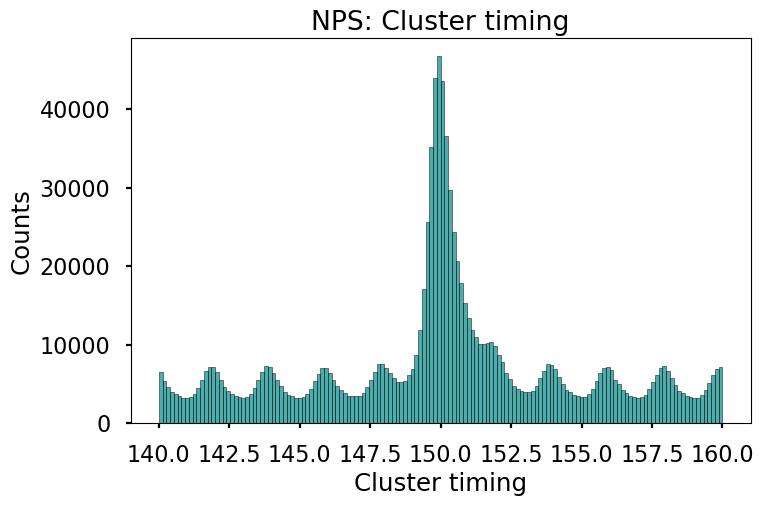

In [14]:
# includes all the cluster instances associated to the events.

plt.figure(figsize=(8,5))
plt.hist(clusT, bins=150, range=(140,160), color="darkcyan", edgecolor="black", alpha=0.7)
plt.xlabel("Cluster timing")
plt.ylabel("Counts")
plt.title("NPS: Cluster timing")
plt.show()

# Missing mass reconstruction 

# 🧭 Coordinate Transformations in Hall C (Jefferson Lab)

This notebook uses a series of rotations to transform momentum vectors between coordinate systems used in Hall C:

## 🔁 Coordinate Systems

| System                  | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **Hall (h)**           | Global frame:  
                         - \(+z_h\): along beam direction  
                         - \(+x_h\): beam-left  
                         - \(+y_h\): vertical up (ceiling) |
| **Spectrometer (s)**   | Aligned with spectrometer central ray:  
                         - \(+z_s\): along spectrometer axis (rotated by θ)  
                         - \(+x_s\): dispersive (toward floor)  
                         - \(+y_s\): non-dispersive (beam-left) |
| **Detector Hut (d)**   | Local detector frame:  
                         - Rotated from spectrometer frame by 25° about \(y_s\)  
                         - \(+z_d\): along dipole bend direction |

---

## 🔄 HMS Electron: Detector Hut → Hall Coordinates

For HMS (to right of beam), apply **inverse rotations**:

1. **Rotate +25° about y-axis**  
   → detector hut → spectrometer  
   `rotate_y(p_vec, 25)`

2. **Rotate +90° about z-axis**  
   → spectrometer → intermediate (undo -90°)  
   `rotate_z(p_spec, 90)`

3. **Rotate +θ about y-axis**  
   → undo spectrometer central angle (e.g., θ = 19.36°)  
   `rotate_y(p_spec, theta_deg)`

---

## 🔄 NPS Photon: Spectrometer → Hall Coordinates

For NPS (to left of beam), apply:

1. **Rotate +90° about z-axis**  
   → spectrometer → intermediate  
   `rotate_z(p_vec, 90)`

2. **Rotate −θ about y-axis**  
   → undo spectrometer angle (e.g., θ = 17.5°)  
   `rotate_y(p_spec, -theta_deg)`

---

## 🧮 Detector Hut Origin Offset

The origin of the detector hut system is **offset** from the Hall origin by distance **L** along the spectrometer axis:

```python
def detector_origin_in_hall(L, theta_deg):
    x = L * sin(θ)
    z = L * cos(θ)


In [3]:
# passive transformations since the coordinate system is being rotated
def rotate_x(vec, theta_deg):
    theta = np.radians(theta_deg)
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta), np.sin(theta)],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return Rx @ vec

def rotate_y(vec, theta_deg):
    theta = np.radians(theta_deg)
    Ry = np.array([
        [np.cos(theta), 0, -np.sin(theta)],
        [0, 1, 0],
        [np.sin(theta), 0, np.cos(theta)]
    ])
    return Ry @ vec

def rotate_z(vec, theta_deg):
    theta = np.radians(theta_deg)
    Rz = np.array([
        [np.cos(theta), np.sin(theta), 0],
        [-np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    return Rz @ vec

def detector_origin_in_hall(L, theta_deg):
    theta = np.radians(theta_deg)
    x = L * np.sin(theta)
    y = 0
    z = L * np.cos(theta)
    return np.array([x, y, z])


def detector_hut_to_hall(px, py, pz, theta_deg): #HMS to the right of beamline
    # Compose all inverse rotations
    p_vec = np.array([px, py, pz])
    # p_spec = rotate_y(p_vec, -25)         # Detector → Spectrometer # this one has to be an active rotation as the electron vector is "artificially bent" for the spectrometer.
    #artificial because that's not because of the scattering. not needed as bothe the coordinate axes and the electron vector are rotated.
    p_spec = rotate_z(p_vec, 90)        # Spec → Hall (undo -90°)
    p_hall = rotate_y(p_spec, theta_deg)  # Undo spectrometer angle θ
    return p_hall

def nps_to_hall(px, py, pz, theta_deg): #NPS to the left of beamline
    # Compose all inverse rotations
    p_vec = np.array([px, py, pz])
    p_hall = rotate_z(p_vec, 90)        # Spec → Hall (undo -90°)
    p_hall = rotate_y(p_hall, -theta_deg)  # Undo spectrometer angle θ
    return p_hall

def detector_hut_to_hall_with_translation(px, py, pz, L=18.1, theta_deg=16.5):
    # 1. Rotate from detector hut to hall
    p_rot = detector_hut_to_hall(px, py, pz, theta_deg)

    # 2. Translate from detector hut origin to hall origin
    origin_shift = detector_origin_in_hall(L, theta_deg)

    # 3. Return full momentum vector (no need to shift momentum itself, but position vectors would be shifted)
    return p_rot  # Use origin_shift if you're dealing with positions


In [4]:
# --- HMS and NPS cut helpers ---
def pass_hms_cuts(edt, dp, et, npe, th, ph):
    return (edt < 0.1 and abs(dp) <= 8.5 and et > 0.6 and npe > 1.0 and
            abs(th) <= 0.09 and abs(ph) <= 0.09)

def is_good_cluster(e, t, x, y):
    return (e >= 0.6 and 148 <= t <= 152 and
            -29.16 < x < 29.16 and -35.64 < y < 35.64)

def get_photon_4vector(E, x, y, z_nps=4.07):
    r = np.array([x, y, z_nps])
    u = r / np.linalg.norm(r)
    p = E * u
    return np.array([E, *p])

def check_opening_angle(e1, e2, x1, y1, x2, y2, z_nps=4.07):
    r1 = np.array([x1, y1, z_nps])
    r2 = np.array([x2, y2, z_nps])
    norm1 = np.sqrt(np.sum(r1 ** 2))
    norm2 = np.sqrt(np.sum(r2 ** 2))
    u1 = r1 / norm1
    u2 = r2 / norm2
    # p1 = e1 * u1
    # p2 = e2 * u2
    # total_E = e1 + e2
    # total_p = p1 + p2

    # Opening angle cut
    theta_ideal = 2 * np.arcsin(M_PION0 / np.sqrt(4 * e1 * e2))
    dot = np.dot(u1, u2)
    dot = min(1.0, max(-1.0, dot))  # Clamp to avoid NaNs from rounding errors
    theta_data = np.arccos(dot)


    # block_dim = 0.0205 # 2.05 x 2.05 cm^2 PbWO4 scintillator block
    theta_tolerance_rad = 0.02 # considering a cluster size of 4x4 blocks and the distance of NPS of 4.07 m. theta = (4x0.0205)/nps_distance

    if np.abs(theta_data - theta_ideal) < theta_tolerance_rad:  # radians
        return 1

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import numba as nb

# Constants
m_e = 0.000511
m_p = 0.938
E_beam = 10.537  # GeV
z_nps = 4.07     # meters

# @nb.njit

# Beam and target 4-vectors
p4_ein = np.array([E_beam, 0, 0, E_beam])
p4_pin = np.array([m_p, 0, 0, 0])

# Event selection: ≥2 clusters
has_two_clust = ak.num(branches["NPS.cal.clusE"]) >= 2

# Extract variables (only for selected events)
edt  = ak.to_numpy(branches["T.hms.hEDTM_tdcTimeRaw"])[has_two_clust]
dp   = ak.to_numpy(branches["H.gtr.dp"])[has_two_clust]
et   = ak.to_numpy(branches["H.cal.etotnorm"])[has_two_clust]
npe  = ak.to_numpy(branches["H.cer.npeSum"])[has_two_clust]
th   = ak.to_numpy(branches["H.gtr.th"])[has_two_clust]
ph   = ak.to_numpy(branches["H.gtr.ph"])[has_two_clust]
pe   = ak.to_numpy(branches["H.gtr.p"])[has_two_clust]
px_e = ak.to_numpy(branches["H.gtr.px"])[has_two_clust]
py_e = ak.to_numpy(branches["H.gtr.py"])[has_two_clust]
pz_e = ak.to_numpy(branches["H.gtr.pz"])[has_two_clust]
Ee   = ak.to_numpy(branches["H.cal.etot"])[has_two_clust]

# Cluster info (still jagged arrays)
clusE = branches["NPS.cal.clusE"][has_two_clust]
clusX = branches["NPS.cal.clusX"][has_two_clust]
clusY = branches["NPS.cal.clusY"][has_two_clust]
clusT = branches["NPS.cal.clusT"][has_two_clust]

missing_mass = []
c = 0
# Loop over events
for i in range(len(pe)):
    # if not pass_hms_cuts(edt[i], dp[i], et[i], npe[i], th[i], ph[i]):
    #     continue
    if Ee[i] < 3.5:
        continue
# transforming from HMS detector hut coordinates to hall coordinates
    p_hall = detector_hut_to_hall(px_e[i], py_e[i], pz_e[i], theta_deg=19.36)
    px_ehall, py_ehall, pz_ehall = p_hall[0], p_hall[1], p_hall[2]

    # Scattered electron 4-vector
    # p4_eout = np.array([Ee[i], px_ehall[i], py_ehall[i], pz_ehall[i]])
    p4_eout = np.array([Ee[i], px_ehall, py_ehall, pz_ehall])

    # Get this event's clusters
    e_arr = np.array(clusE[i])
    x_arr = np.array(clusX[i])
    y_arr = np.array(clusY[i])
    t_arr = np.array(clusT[i])

    if len(e_arr) < 2:
        continue

    # Sort cluster indices by energy (descending)
    idx = np.argsort(e_arr)[-2:]

    # Select two most energetic clusters
    e1, e2 = e_arr[idx[1]], e_arr[idx[0]]
    x1, x2 = x_arr[idx[1]], x_arr[idx[0]]
    y1, y2 = y_arr[idx[1]], y_arr[idx[0]]
    t1, t2 = t_arr[idx[1]], t_arr[idx[0]]

    # if not (is_good_cluster(e1, t1, x1, y1) and is_good_cluster(e2, t2, x2, y2)):
    #     continue

    if not check_opening_angle(e1, e2, x1, y1, x2, y2):
        continue




    # π⁰ 4-vector from 2 photons
    # Build photon 4-vectors in hall frame individually
    photon1 = get_photon_4vector(e1, x1, y1)
    photon2 = get_photon_4vector(e2, x2, y2)

    # Rotate photon momenta to hall frame
    p1x, p1y, p1z = nps_to_hall(photon1[1], photon1[2], photon1[3], theta_deg=17.51)
    p2x, p2y, p2z = nps_to_hall(photon2[1], photon2[2], photon2[3], theta_deg=17.51)

    # Construct full 4-vectors
    p4_ph1 = np.array([photon1[0], p1x, p1y, p1z])
    p4_ph2 = np.array([photon2[0], p2x, p2y, p2z])

    # Add to get pion
    p4_pi = p4_ph1 + p4_ph2


    # Final state and missing 4-momentum
    p4_out = p4_eout + p4_pi
    p4_miss = (p4_ein + p4_pin) - p4_out
    m2_miss = p4_miss[0]**2 - np.dot(p4_miss[1:], p4_miss[1:])
    if m2_miss < -1:
        temp1 = p4_pi[0]**2 - np.dot(p4_pi[1:], p4_pi[1:])
        temp2 = p4_pin[0]**2 - np.dot(p4_pin[1:], p4_pin[1:])
        temp3 = p4_ein[0]**2 - np.dot(p4_ein[1:], p4_ein[1:])
        temp4 = p4_eout[0]**2 - np.dot(p4_eout[1:], p4_eout[1:])
        print(f"incoming electron: {np.sqrt(temp3)}, incoming proton: {np.sqrt(temp2)}, scattered electron^2: {temp4}, pion: {np.sqrt(temp1)}")
        print(f"total in: {p4_ein + p4_pin}, square: {(p4_ein + p4_pin)[0]**2 - (p4_ein + p4_pin)[3]**2}")
        print(f"eout unrotated: {Ee[i], px_e[i], py_e[i], pz_e[i]}, square: {Ee[i]**2 - px_e[i]**2 - py_e[i]**2 - pz_e[i]**2}")
        print(f"eout 4vec: {p4_eout}, square: {p4_eout[0]**2 - p4_eout[1]**2 - p4_eout[2]**2 - p4_eout[3]**2}")
        print(f"pi 4vec:   {p4_pi}, square: {p4_pi[0]**2 - p4_pi[1]**2 - p4_pi[2]**2 - p4_pi[3]**2}")
        print(f"total out: {p4_out}, square: {p4_out[0]**2 - p4_out[1]**2 - p4_out[2]**2 - p4_out[3]**2}")
        print(f"miss 4vec: {p4_miss}")
        print(f"m²_miss:   {m2_miss:.4f}")


        # print(f"BAD m²_miss = {m2_miss:.2f}, px={p4_out[1]:.2f}, py={p4_out[2]:.2f}, pz={p4_out[3]:.2f}")

    # print(m2_miss)
    # m_miss = np.sqrt(m2_miss) if m2_miss > 0 else 0
    missing_mass.append(m2_miss)
    c = c+1

# # Plot
plt.figure(figsize=(8,6))
plt.hist(missing_mass, bins=100, range = (-70, 1.2), color='steelblue', alpha=0.75)
plt.axvline(m_p, color='red', linestyle='--', label='Proton Mass (0.938 GeV)')
plt.xlabel("Missing Mass [GeV]")
plt.ylabel("Counts")
plt.title("Exclusive π⁰ Event: Reconstructed Missing Mass (Undetected Proton)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_950/2468536946.py:57: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  e_arr = np.array(clusE[i])
/tmp/ipykernel_950/2468536946.py:58: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x_arr = np.array(clusX[i])
/tmp/ipykernel_950/2468536946.py:59: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy

incoming electron: 0.0, incoming proton: 0.938, scattered electron^2: -0.5729887299461787, pion: 0.12479676560762264
total in: [11.475  0.     0.    10.537], square: 20.647256000000013
eout unrotated: (np.float64(5.177598193359374), np.float64(-1.76280849315213), np.float64(-0.1915100947271916), np.float64(4.9230419337958855)), square: -0.5729887299461716
eout 4vec: [ 5.17759819 -1.81268202  1.76280849  4.5811791 ], square: -0.5729887299461751
pi 4vec:   [ 1.17175312  1.16059005 -0.04722863 -0.09072679], square: 0.015574232706123861
total out: [ 6.34935132 -0.65209197  1.71557986  4.4904523 ], square: 16.78166208438952
miss 4vec: [ 5.12564868  0.65209197 -1.71557986  6.0465477 ]
m²_miss:   -13.6569
incoming electron: 0.0, incoming proton: 0.938, scattered electron^2: -1.1072248626700443, pion: 0.1592426436996935
total in: [11.475  0.     0.    10.537], square: 20.647256000000013
eout unrotated: (np.float64(4.520927490234375), np.float64(-1.5652184334326469), np.float64(0.16096600328700

/tmp/ipykernel_950/1900031989.py:29: RuntimeWarning: invalid value encountered in arcsin
  theta_ideal = 2 * np.arcsin(M_PION0 / np.sqrt(4 * e1 * e2))


incoming electron: 0.0, incoming proton: 0.938, scattered electron^2: -0.9259203929923707, pion: 0.13871403679100366
total in: [11.475  0.     0.    10.537], square: 20.647256000000013
eout unrotated: (np.float64(5.049143945312499), np.float64(-1.5863948365661213), np.float64(-0.016727327068670358), np.float64(4.889053752263696)), square: -0.9259203929923743
eout 4vec: [ 5.04914395 -1.63651529  1.58639484  4.60705373], square: -0.9259203929923672
pi 4vec:   [ 1.31749724 -0.51485744 -1.11068136  0.4667613 ], square: 0.01924158400285622
total out: [ 6.36664118 -2.15137273  0.47571348  5.07381504], square: 9.935812972591016
miss 4vec: [ 5.10835882  2.15137273 -0.47571348  5.46318496]
m²_miss:   -8.6058
incoming electron: 0.0, incoming proton: 0.938, scattered electron^2: -1.969640484961289, pion: 0.14378278783700077
total in: [11.475  0.     0.    10.537], square: 20.647256000000013
eout unrotated: (np.float64(5.4208225097656255), np.float64(-1.8506780455459835), np.float64(0.070327334862

KeyboardInterrupt: 

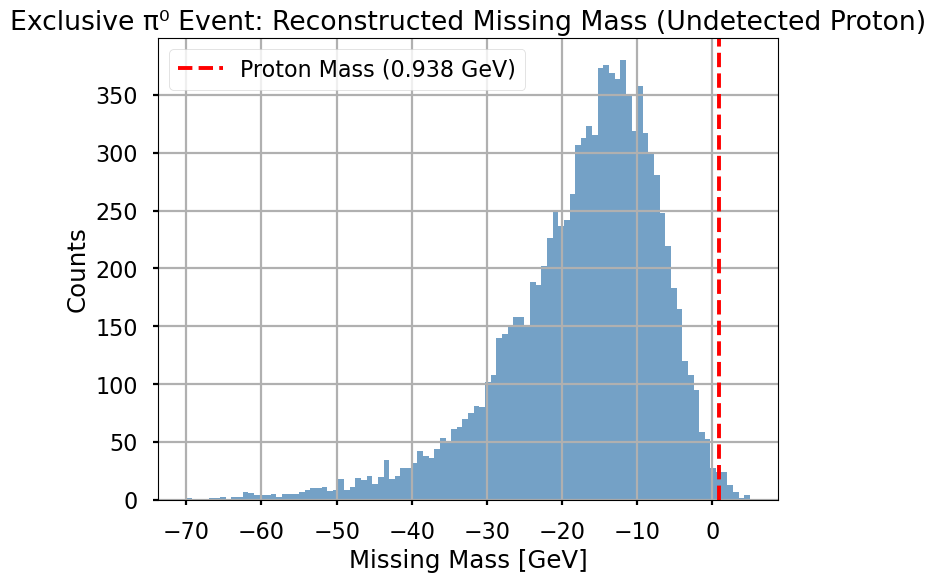

In [23]:
# Plot
plt.figure(figsize=(8,6))
plt.hist(missing_mass, bins=100, range=(-70,5), color='steelblue', alpha=0.75)
plt.axvline(m_p, color='red', linestyle='--', label='Proton Mass (0.938 GeV)')
plt.xlabel("Missing Mass [GeV]")
plt.ylabel("Counts")
plt.title("Exclusive π⁰ Event: Reconstructed Missing Mass (Undetected Proton)")
plt.legend()
plt.grid(True)
plt.show()

In [103]:
v = np.array([1,0,0])  # purely x in hut frame
v_hall = detector_hut_to_hall(*v, theta_deg=19.36)
print(v_hall)


[-0.14009903 -0.90630779  0.39872102]


In [106]:
p4_miss = p4_ein + p4_pin - (p4_eout + p4_pi)
m2_miss = p4_miss[0]**2 - np.dot(p4_miss[1:], p4_miss[1:])
p4_miss

array([ 1.42216064,  3.84039201, -2.37672051,  4.36147852])

In [127]:
missing_mass

[np.float64(-39.15487765975361),
 np.float64(-48.688315993924135),
 np.float64(-34.68181782720928),
 np.float64(-20.510037025268417),
 np.float64(-37.92591324808035),
 np.float64(-67.09669983891627),
 np.float64(-45.62626869254492),
 np.float64(-44.787655397416465),
 np.float64(-24.09299952738634),
 np.float64(-43.585820565413314),
 np.float64(-1.9999999999999995e+76),
 np.float64(-34.3053229185077),
 np.float64(-24.824831384640078),
 np.float64(-45.65753484545051),
 np.float64(-28.65252678319045),
 np.float64(-28.85685834373012),
 np.float64(-27.9920357543946),
 np.float64(-58.47971777672798),
 np.float64(-32.971799106281374),
 np.float64(-43.294195059949274),
 np.float64(-36.798138759351374),
 np.float64(-30.797431965449384),
 np.float64(-44.93520772295396),
 np.float64(-64.73294663377575),
 np.float64(-39.61518438063002),
 np.float64(-38.33361163133971),
 np.float64(-26.324533097895713),
 np.float64(-37.143464462762246),
 np.float64(-42.68726368701691),
 np.float64(-36.6883705581084

In [10]:
has_two_clust = ak.num(branches["NPS.cal.clusE"]) >= 2

<Array [False, False, False, ..., False, False, False] type='1435976 * bool'>

/home/ubuntu/miniconda3/envs/everything/lib/python3.13/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: overflow encountered in power
  return impl(*broadcasted_args, **(kwargs or {}))


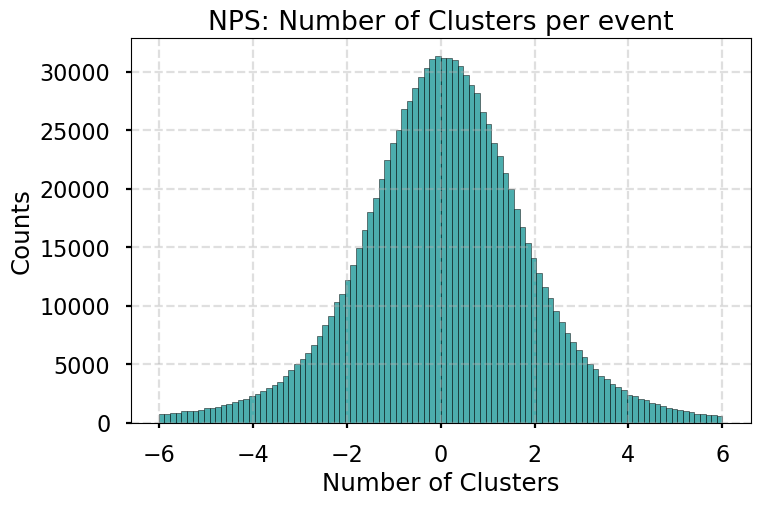

In [19]:


# Create an empty list
filter_arr = []

# go through each element in arr
for element in branches["H.cal.etot"]:
  # if the element is higher than 42, set the value to True, otherwise False:
  if element > 3.5:
    filter_arr.append(True)
  else:
    filter_arr.append(False)

newarr = (1.0183*branches["H.cal.etot"][filter_arr])**2 - branches["H.gtr.p"][filter_arr]**2

plt.figure(figsize=(8, 5))
plt.hist(newarr, bins=100, range = (-6,6), color="darkcyan", edgecolor="black", alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Counts")
plt.title("NPS: Number of Clusters per event")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


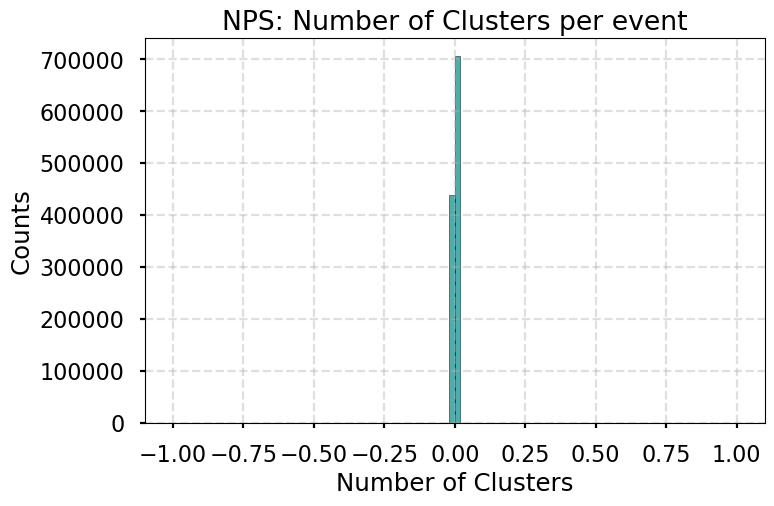

In [18]:
temptemp = ak.to_numpy(branches["H.gtr.p"]**2 - branches["H.gtr.px"]**2 - branches["H.gtr.py"]**2 - branches["H.gtr.pz"]**2)
plt.figure(figsize=(8, 5))
plt.hist(temptemp, bins=100, range = (-1,1), color="darkcyan", edgecolor="black", alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Counts")
plt.title("NPS: Number of Clusters per event")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()